# Ball Drop Experiment

## Data

In [1]:
install.packages("faraway")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [2]:
library(MASS)       
library(car)        
library(ggplot2)
library(dplyr)
library(faraway)

Loading required package: carData


Attaching package: ‘dplyr’


The following object is masked from ‘package:car’:

    recode


The following object is masked from ‘package:MASS’:

    select


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘faraway’


The following objects are masked from ‘package:car’:

    logit, vif




In [3]:
data = read.csv("data.csv")

In [4]:
data$bounce_height = as.integer(data$bounce_height)
data$initial_height = if_else(data$height == -1, 100, 200)
data$fr_bounce_height = (data$bounce_height/data$initial_height)*100
data

ground,pressure,weight,wind,height,type,bounce_height,initial_height,fr_bounce_height
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
-1,-1,-1,-1,-1,-1,53,100,53.0
-1,1,-1,-1,1,1,49,200,24.5
-1,-1,1,-1,1,-1,105,200,52.5
-1,1,1,-1,-1,1,16,100,16.0
-1,-1,-1,1,-1,1,27,100,27.0
-1,1,-1,1,1,-1,80,200,40.0
-1,-1,1,1,1,1,47,200,23.5
-1,1,1,1,-1,-1,54,100,54.0
1,-1,-1,-1,1,1,118,200,59.0


## Assumption Check


Call:
lm(formula = fr_bounce_height ~ ground + pressure + weight + 
    wind + height + type + pressure:ground + pressure:height + 
    ground:wind + pressure:weight + pressure:wind + wind:height + 
    weight:wind, data = data)

Residuals:
     1      2      3      4      5      6      7      8      9     10     11 
 1.250  1.062 -1.250 -1.062 -1.250 -1.062  1.250  1.062 -1.062 -1.250  1.062 
    12     13     14     15     16 
 1.062  1.250  1.250 -1.062 -1.250 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      48.3438     0.8203  58.936 0.000288 ***
ground           12.0313     0.8203  14.667 0.004616 ** 
pressure         -1.9062     0.8203  -2.324 0.145745    
weight            1.6562     0.8203   2.019 0.180924    
wind              0.8438     0.8203   1.029 0.411791    
height           -3.5312     0.8203  -4.305 0.049950 *  
type             -4.3438     0.8203  -5.295 0.033860 *  
ground:pressure   0.7813     0.8203   0.952 0.441402    
pr

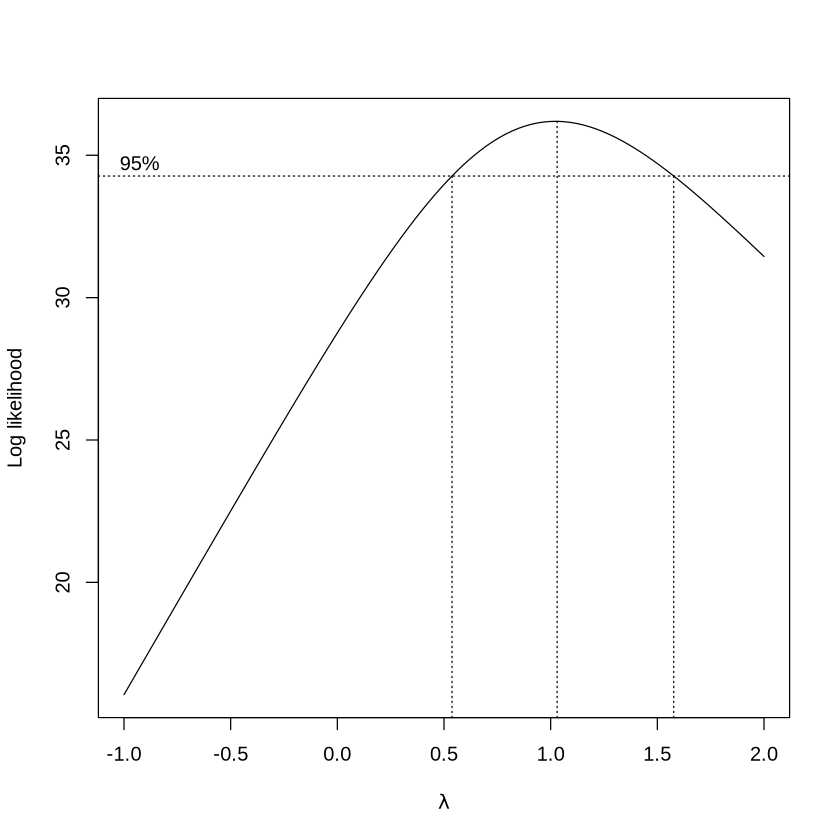

In [5]:
model = lm(fr_bounce_height ~ ground + pressure + weight + wind + height + type + pressure:ground + pressure:height + ground:wind + pressure:weight + pressure:wind + wind:height + weight:wind, data = data)
summary(model)
boxcox_result <- boxcox(model, lambda = seq(-1, 2, 0.1), ylab="Log likelihood")

In [6]:
aov.summary = summary(aov(model))
aov.summary

                Df Sum Sq Mean Sq F value  Pr(>F)   
ground           1 2316.0  2316.0 215.131 0.00462 **
pressure         1   58.1    58.1   5.401 0.14575   
weight           1   43.9    43.9   4.077 0.18092   
wind             1   11.4    11.4   1.058 0.41179   
height           1  199.5   199.5  18.533 0.04995 * 
type             1  301.9   301.9  28.042 0.03386 * 
ground:pressure  1    9.8     9.8   0.907 0.44140   
pressure:height  1   34.5    34.5   3.206 0.21525   
ground:wind      1   17.0    17.0   1.581 0.33560   
pressure:weight  1   87.9    87.9   8.164 0.10377   
pressure:wind    1 1359.8  1359.8 126.306 0.00782 **
wind:height      1  172.3   172.3  16.001 0.05719 . 
weight:wind      1   26.3    26.3   2.440 0.25870   
Residuals        2   21.5    10.8                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

### Confidence Intervals

In [8]:
summary.model = summary(model)
se.estimate = summary.model$coefficients[1,2]
estimate = summary.model$coefficients[-1,1]

# 95% confidence interval for the *parameter* effect
ground.ci = estimate["ground"] + c(-1,1)*qt(0.975, df = 2) * se.estimate
height.ci = estimate["height"] + c(-1,1)*qt(0.975, df = 2) * se.estimate
type.ci = estimate["type"] + c(-1,1)*qt(0.975, df = 2) * se.estimate
pw.ci = estimate["pressure:wind"] + c(-1,1)*qt(0.975, df = 2) * se.estimate
wh.ci = estimate["wind:height"] + c(-1,1)*qt(0.975, df = 2) * se.estimate

ground.ci
height.ci
type.ci
pw.ci
wh.ci

[1]  8.50189 15.56061

[1] -7.060609745 -0.001890255

[1] -7.8731097 -0.8143903

[1]  5.68939 12.74811

[1] -6.8106097  0.2481097

## Half-Normal Plot

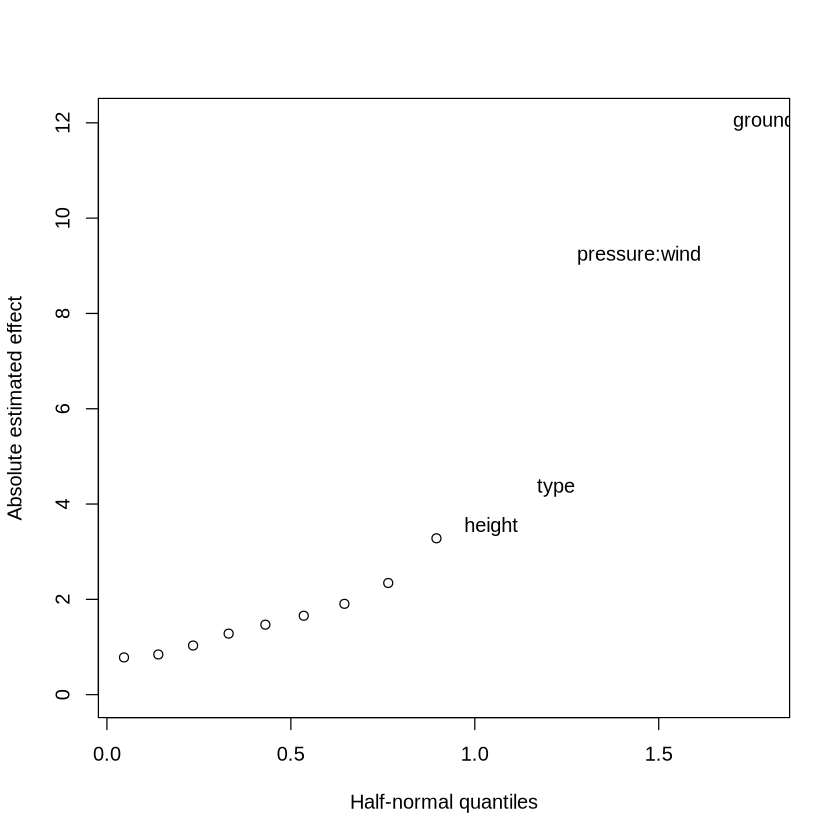

In [9]:
model.coef <- coefficients(model)
halfnorm(
  model.coef[-1],
  ylab = "Absolute estimated effect",
  nlab = 4,
  labs = c(
    "ground", "pressure", "weight", "wind", "height", "type", 
    "pressure:ground", "pressure:height", "ground:wind", 
    "pressure:weight", "pressure:wind", "wind:height", 
    "weight:wind"
  )
)

## Main-Effect and Interaction Plots

### Main-Effects Plot

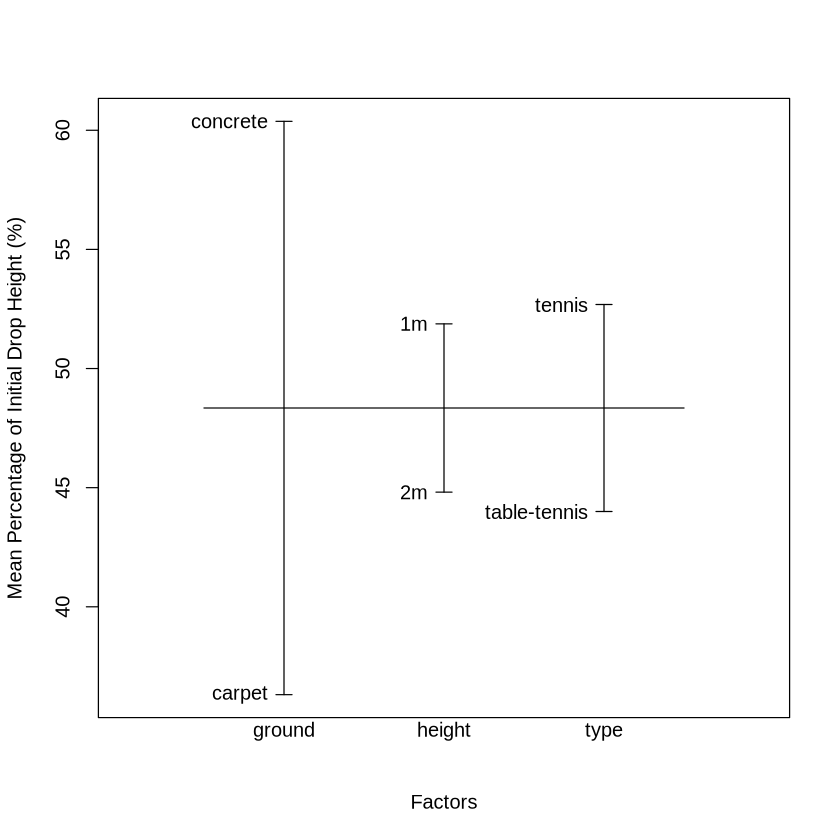

In [10]:
data$ground = factor(data$ground, labels=c("carpet","concrete"))
data$pressure = factor(data$pressure, labels=c("old", "new"))
data$weight = factor(data$weight, labels=c("heavy", "light"))
data$wind = factor(data$wind, labels=c("no wind", "wind"))
data$height = factor(data$height, labels=c("1m", "2m"))
data$type = factor(data$type, labels=c("tennis", "table-tennis"))

plot.design(fr_bounce_height ~ ground + height + type,
             ylab = "Mean Percentage of Initial Drop Height (%)",
             data = data)

### Interaction Plots

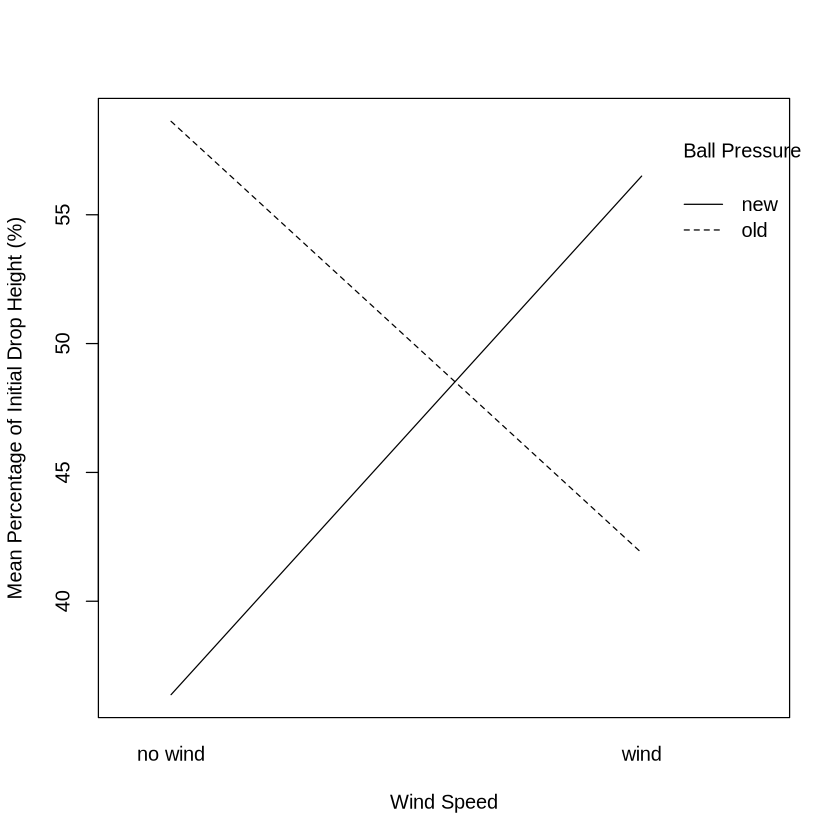

In [11]:
interaction.plot(data$wind, data$pressure, data$fr_bounce_height, 
                 xlab="Wind Speed", ylab="Mean Percentage of Initial Drop Height (%)",trace.label="Ball Pressure")

## Contrast

In [12]:
model.tables(aov(model), type="mean", se=TRUE, cterms=c("ground", "type", "pressure:wind"))

Warning message in replications(paste("~", xx), data = mf):
“non-factors ignored: ground”
Warning message in replications(paste("~", xx), data = mf):
“non-factors ignored: type”
Warning message in replications(paste("~", xx), data = mf):
“non-factors ignored: pressure, wind”


Tables of means
Grand mean
         
48.34375 

 ground 
ground
   -1     1 
36.31 60.38 

 type 
type
   -1     1 
52.69 44.00 

 pressure:wind 
        wind
pressure -1    1    
      -1 58.62 41.88
      1  36.38 56.50

Standard errors for differences of means
        [,1]
        NULL
replic. NULL

In [13]:
# 95% confidence interval for the *contrast* effect transformed to the original scale
2*ground.ci
2*height.ci
2*type.ci
2*pw.ci
2*wh.ci

[1] 17.00378 31.12122

[1] -14.12121949  -0.00378051

[1] -15.746219  -1.628781

[1] 11.37878 25.49622

[1] -13.6212195   0.4962195

## Prediction

### No Wind

In [14]:
x = data.frame("ground"=1, "pressure"=-1,"weight"=0,"wind"=-1,height=1,type=-1)
prediction = predict(model, x, se.fit=TRUE)
prediction

$fit
       1 
71.46875 

$se.fit
[1] 2.720545

$df
[1] 2

$residual.scale
[1] 3.281101

In [15]:
mean.ci.nowind = prediction$fit + c(-1,1)*qt(0.975,2)*prediction$se.fit
mean.ci.nowind

[1] 59.76319 83.17431

### Wind

In [16]:
x = data.frame("ground"=1, "pressure"=1,"weight"=0,"wind"=1,height=1,type=-1)
prediction2 = predict(model, x, se.fit=TRUE)
prediction2

$fit
       1 
69.34375 

$se.fit
[1] 2.720545

$df
[1] 2

$residual.scale
[1] 3.281101

In [17]:
mean.ci.wind = prediction2$fit + c(-1,1)*qt(0.975,2)*prediction2$se.fit
mean.ci.wind

[1] 57.63819 81.04931